# _New York Times_ Clicks

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

In [7]:
nyt = pd.read_csv("dds_ch2_nyt/nyt1.csv")
nyt[:5]

,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1


## Question 1

In [36]:
def get_age_group(age):
    if age<18:
        return '<18'
    elif age<25:
        return '18-24'
    elif age<35:
        return '25-34'
    elif age<45:
        return '35-44'
    elif age<55:
        return '45-54'
    elif age<65:
        return '55-64'
    else:
        return '65+'
nyt['Age_Group'] = nyt['Age'].apply(get_age_group)
nyt['Click_Through'] = nyt['Clicks']/nyt['Impressions']

In [37]:
nyt.loc[nyt['Clicks']>0][:10]

,Age,Gender,Impressions,Clicks,Signed_In,Age_Group,Click_Through
5,47,0,11,1,1,45-54,0.090909
6,0,0,7,1,0,<18,0.142857
10,0,0,8,1,0,<18,0.125000
39,0,0,7,2,0,<18,0.285714
63,0,0,2,1,0,<18,0.500000
72,0,0,6,1,0,<18,0.166667
75,64,1,7,1,1,55-64,0.142857
85,0,0,7,1,0,<18,0.142857
106,0,0,2,1,0,<18,0.500000
128,0,0,3,1,0,<18,0.333333


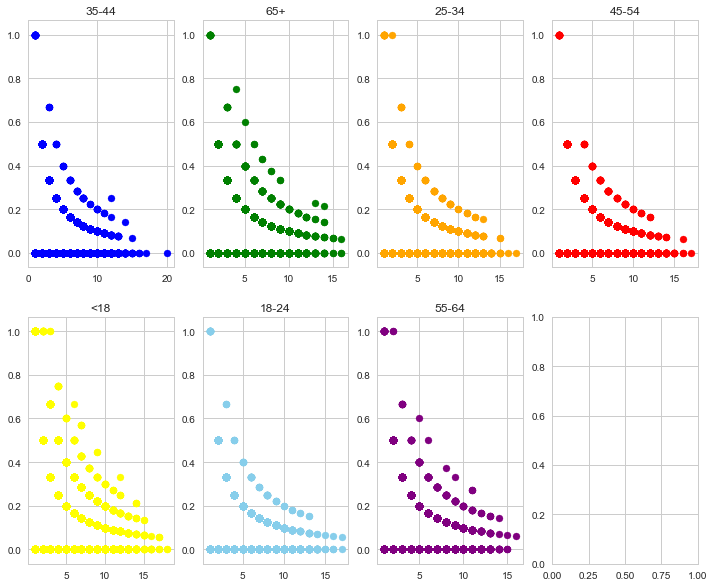

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(12,10))

colors = ['blue','green','orange','red','yellow','skyblue','purple']
for i,age_group in enumerate(nyt['Age_Group'].unique()):
    d = nyt.loc[nyt['Age_Group']==age_group]
    axes[i//4,i%4].scatter(d["Impressions"], d["Click_Through"],color=colors[i])
    axes[i//4,i%4].set_title(age_group)